<a href="https://colab.research.google.com/github/jeraldtt/SC1015-Credit-Card-Fraud/blob/main/SC1015_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For Kaggle API

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mishra5001/credit-card
!unzip credit-card.zip

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
 92% 103M/112M [00:01<00:00, 54.7MB/s] 
100% 112M/112M [00:01<00:00, 66.5MB/s]
Archive:  credit-card.zip
  inflating: application_data.csv    
  inflating: columns_description.csv  
  inflating: previous_application.csv  


# Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
app_data = "/content/application_data.csv"
prev_app_data = "/content/previous_application.csv"
col_desc = "/content/columns_description.csv"

In [ ]:
app_df = pd.read_csv(app_data) 
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_df.shape

(307511, 122)

In [ ]:
#sb.heatmap(app_df.corr(), vmin=-1, vmax=1)

In [ ]:
refined_app = app_df[["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR",
                      "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", 
                      "AMT_ANNUITY", "AMT_GOODS_PRICE", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", 
                      "DAYS_BIRTH", "DAYS_EMPLOYED", "OCCUPATION_TYPE", "OBS_30_CNT_SOCIAL_CIRCLE", 
                      "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]]
refined_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,-9461,-637,Laborers,2.0,2.0,2.0,2.0
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,-16765,-1188,Core staff,1.0,0.0,1.0,0.0
2,100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,-19046,-225,Laborers,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,-19005,-3039,Laborers,2.0,0.0,2.0,0.0
4,100007,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,-19932,-3038,Core staff,0.0,0.0,0.0,0.0


In [ ]:
refined_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,1.422245,0.143421,1.405292,0.100049
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,2.400989,0.446698,2.379803,0.362291
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,2.000000,0.000000,2.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,348.000000,34.000000,344.000000,24.000000


<ipython-input-10-a13152cf8086>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(refined_app.corr(), vmin=-1, vmax=1)


<Axes: >

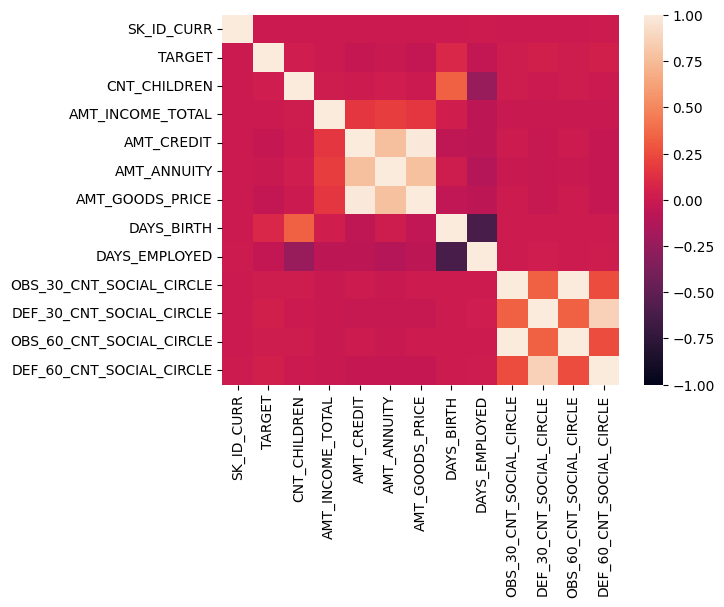

In [ ]:
sb.heatmap(refined_app.corr(), vmin=-1, vmax=1)

In [ ]:
# Count the number of occurrences of each value in the "TARGET" column of the original dataset
original_target_counts = app_df["TARGET"].value_counts()

# Print the number of (TARGET = 1) before dropping outliers
print("Number of (TARGET = 1) before dropping outliers:", original_target_counts[1])


Number of (TARGET = 1) before dropping outliers: 24825


## Checking for NULL values within the dataset

In [ ]:
refined_app.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
AMT_GOODS_PRICE               278
NAME_TYPE_SUITE              1292
NAME_INCOME_TYPE                0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
OCCUPATION_TYPE             96391
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
dtype: int64

In [ ]:
refined_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                307511 non-null  int64  
 1   TARGET                    307511 non-null  int64  
 2   NAME_CONTRACT_TYPE        307511 non-null  object 
 3   FLAG_OWN_CAR              307511 non-null  object 
 4   FLAG_OWN_REALTY           307511 non-null  object 
 5   CNT_CHILDREN              307511 non-null  int64  
 6   AMT_INCOME_TOTAL          307511 non-null  float64
 7   AMT_CREDIT                307511 non-null  float64
 8   AMT_ANNUITY               307499 non-null  float64
 9   AMT_GOODS_PRICE           307233 non-null  float64
 10  NAME_TYPE_SUITE           306219 non-null  object 
 11  NAME_INCOME_TYPE          307511 non-null  object 
 12  DAYS_BIRTH                307511 non-null  int64  
 13  DAYS_EMPLOYED             307511 non-null  i

In [ ]:
for columns in refined_app:
  uniqueList = refined_app[columns].unique()
  print(columns,"(", str(len(uniqueList)), "): ", uniqueList, "\n")

SK_ID_CURR ( 307511 ):  [100002 100003 100004 ... 456253 456254 456255] 

TARGET ( 2 ):  [1 0] 

NAME_CONTRACT_TYPE ( 2 ):  ['Cash loans' 'Revolving loans'] 

FLAG_OWN_CAR ( 2 ):  ['N' 'Y'] 

FLAG_OWN_REALTY ( 2 ):  ['Y' 'N'] 

CNT_CHILDREN ( 15 ):  [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14] 

AMT_INCOME_TOTAL ( 2548 ):  [202500.  270000.   67500.  ...  96768.  546250.5 113062.5] 

AMT_CREDIT ( 5603 ):  [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ] 

AMT_ANNUITY ( 13673 ):  [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5] 

AMT_GOODS_PRICE ( 1003 ):  [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5] 

NAME_TYPE_SUITE ( 8 ):  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people'] 

NAME_INCOME_TYPE ( 8 ):  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 

DAYS_BIRTH ( 17460 ):  [ -9461 -16765 -19046 ...  -7951  -7857 -25061] 

DA

Dropping duplicated values and comparing if fraud qty has changed

In [ ]:
df = refined_app.copy()
df.drop_duplicates(inplace=True)
print('The amount of frauds in df before dropping duplicates:', len(refined_app[refined_app['TARGET'] == 1]))
print('The amount of frauds in df after dropping duplicates:', len(df[df['TARGET'] == 1]))


The amount of frauds in df before dropping duplicates: 24825
The amount of frauds in df after dropping duplicates: 24825


##Split to Numerical and Categorical

In [ ]:
#refined_app["TARGET"].convert_dtypes(convert_string = True)     
refined_num = refined_app.select_dtypes(include=[np.number])
refined_cat_raw = refined_app.select_dtypes(exclude=[np.number])
refined_cat_raw.insert(0, "SK_ID_CURR", refined_num["SK_ID_CURR"])

target_col = refined_num["TARGET"]
#refined_num.drop(["TARGET"], axis=1, inplace=True)

print("numerical: ", refined_num.shape, " | categorical: ", refined_cat_raw.shape, '\n')
refined_cat_raw.info()
print('\n')
refined_num.info()

numerical:  (307511, 13)  | categorical:  (307511, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   SK_ID_CURR          307511 non-null  int64 
 1   NAME_CONTRACT_TYPE  307511 non-null  object
 2   FLAG_OWN_CAR        307511 non-null  object
 3   FLAG_OWN_REALTY     307511 non-null  object
 4   NAME_TYPE_SUITE     306219 non-null  object
 5   NAME_INCOME_TYPE    307511 non-null  object
 6   OCCUPATION_TYPE     211120 non-null  object
dtypes: int64(1), object(6)
memory usage: 16.4+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                307511 non-null  int64  
 1   TARGET                    307511 non-null  int64  
 2   

### Fill in numerical data with MEDIAN

In [ ]:
def median_impute(df,col):
    return df[col].fillna(df[col].median())

refined_num['AMT_ANNUITY'] = median_impute(refined_num,'AMT_ANNUITY')
refined_num['AMT_GOODS_PRICE'] = median_impute(refined_num,'AMT_GOODS_PRICE')
refined_num['OBS_30_CNT_SOCIAL_CIRCLE'] = median_impute(refined_num, 'OBS_30_CNT_SOCIAL_CIRCLE')
refined_num['DEF_30_CNT_SOCIAL_CIRCLE'] = median_impute(refined_num, 'DEF_30_CNT_SOCIAL_CIRCLE')
refined_num['OBS_60_CNT_SOCIAL_CIRCLE'] = median_impute(refined_num, 'OBS_60_CNT_SOCIAL_CIRCLE')
refined_num['DEF_60_CNT_SOCIAL_CIRCLE'] = median_impute(refined_num, 'DEF_60_CNT_SOCIAL_CIRCLE')

refined_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                307511 non-null  int64  
 1   TARGET                    307511 non-null  int64  
 2   CNT_CHILDREN              307511 non-null  int64  
 3   AMT_INCOME_TOTAL          307511 non-null  float64
 4   AMT_CREDIT                307511 non-null  float64
 5   AMT_ANNUITY               307511 non-null  float64
 6   AMT_GOODS_PRICE           307511 non-null  float64
 7   DAYS_BIRTH                307511 non-null  int64  
 8   DAYS_EMPLOYED             307511 non-null  int64  
 9   OBS_30_CNT_SOCIAL_CIRCLE  307511 non-null  float64
 10  DEF_30_CNT_SOCIAL_CIRCLE  307511 non-null  float64
 11  OBS_60_CNT_SOCIAL_CIRCLE  307511 non-null  float64
 12  DEF_60_CNT_SOCIAL_CIRCLE  307511 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 30.5 M

### Fill in categorical data

In [ ]:
  #fill in categorical data null      ||    OCCUPATION_TYPE missing ALOT (how??)
refined_cat_raw['NAME_TYPE_SUITE'] = refined_cat_raw['NAME_TYPE_SUITE'].fillna("Unaccompanied")
refined_cat_raw['OCCUPATION_TYPE'] = refined_cat_raw['OCCUPATION_TYPE'].fillna("NILL")

refined_cat_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   SK_ID_CURR          307511 non-null  int64 
 1   NAME_CONTRACT_TYPE  307511 non-null  object
 2   FLAG_OWN_CAR        307511 non-null  object
 3   FLAG_OWN_REALTY     307511 non-null  object
 4   NAME_TYPE_SUITE     307511 non-null  object
 5   NAME_INCOME_TYPE    307511 non-null  object
 6   OCCUPATION_TYPE     307511 non-null  object
dtypes: int64(1), object(6)
memory usage: 16.4+ MB


### Data Visualisation

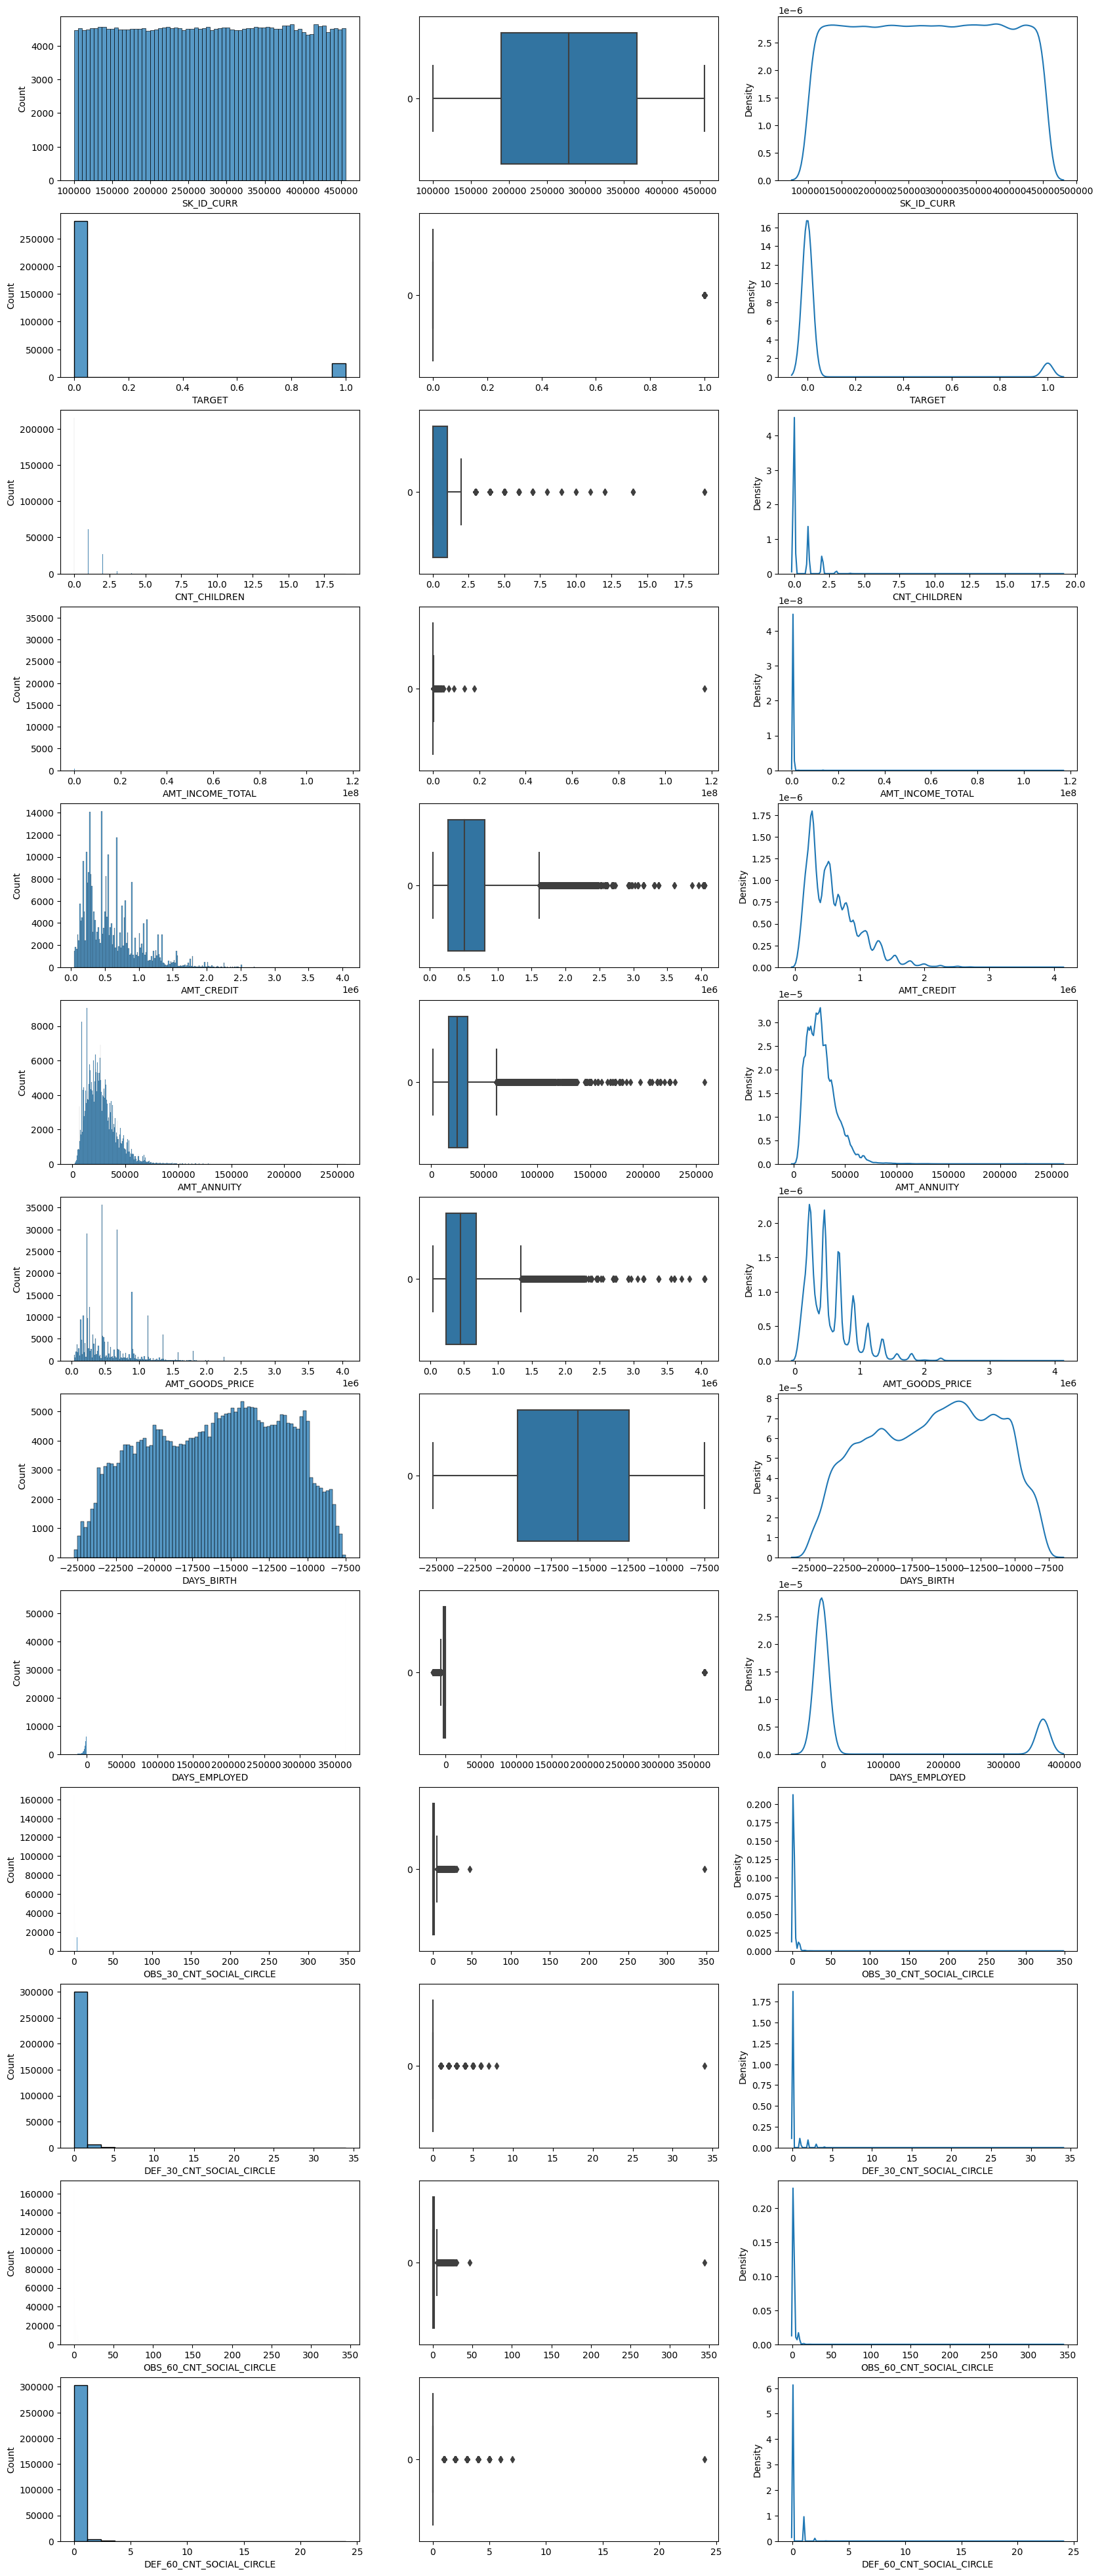

In [ ]:
f, axes = plt.subplots(len(refined_num.columns), 3, figsize=(20, 50))
count = 0

for col in refined_num:
  sb.histplot(data = refined_num[col], kde = False, ax = axes[count, 0])
  sb.boxplot(data = refined_num[col], orient = 'h', ax = axes[count, 1])
  sb.kdeplot(data = refined_num[col], ax = axes[count, 2])
  count += 1

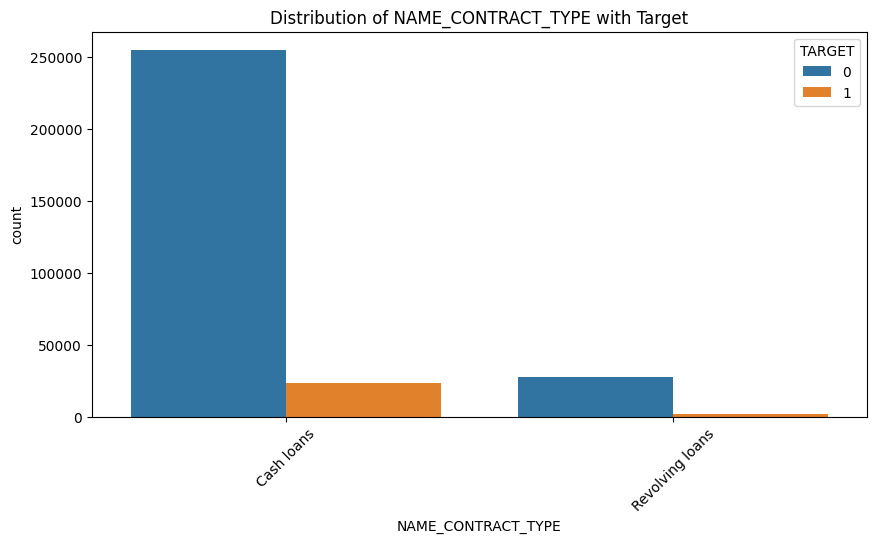

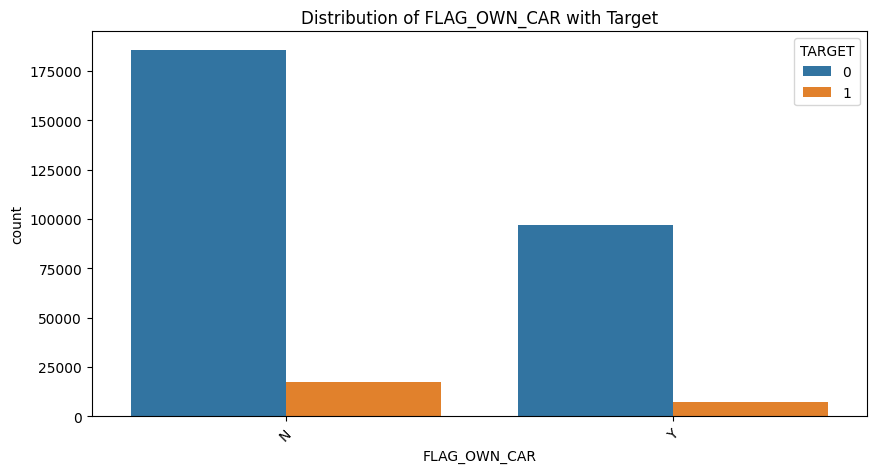

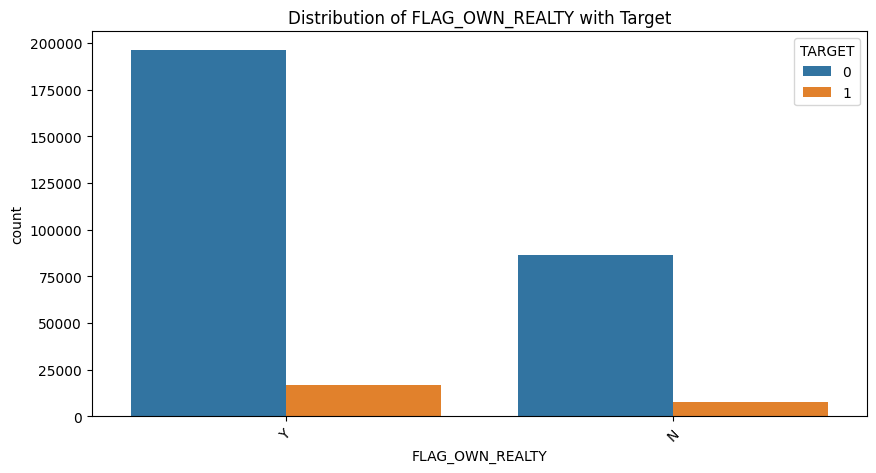

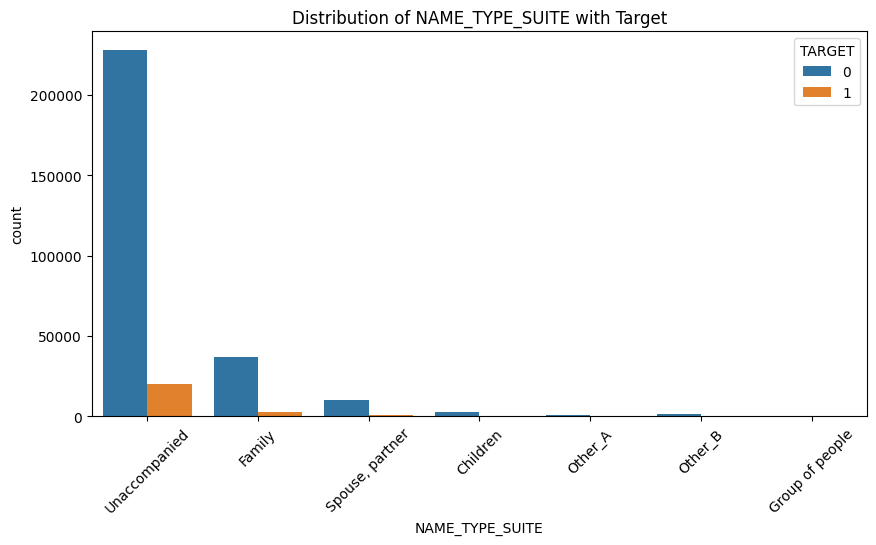

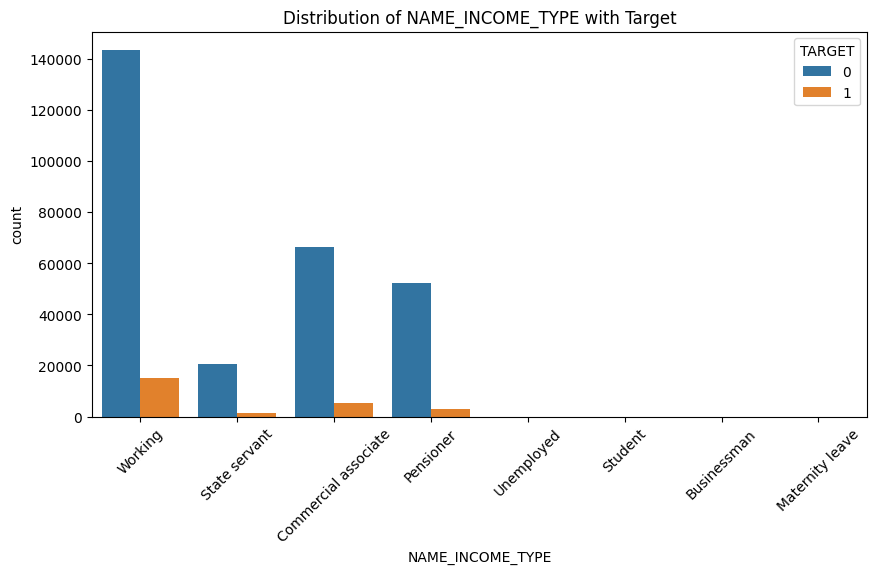

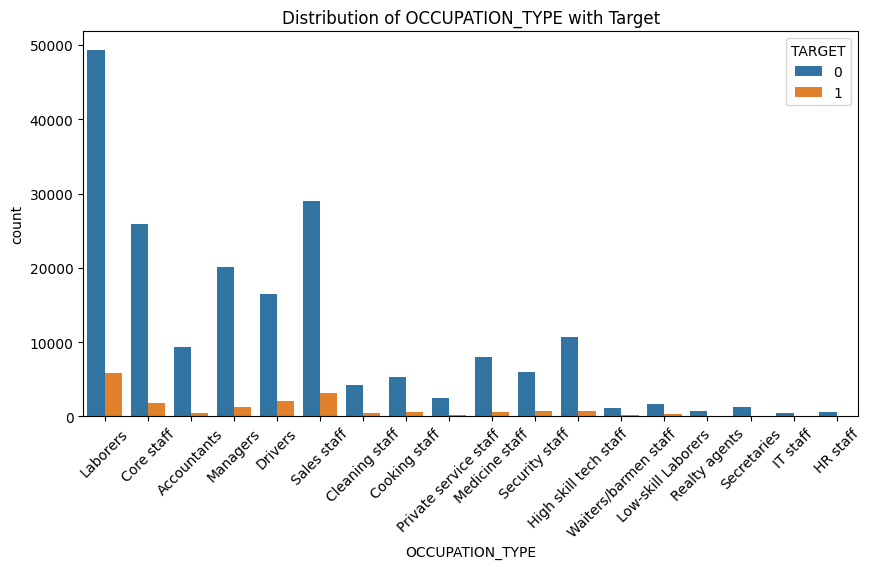

In [ ]:
#visualise for categorical variables against target

# Loop through each categorical column
for column in refined_cat_raw.columns:
    if column != 'SK_ID_CURR':  # Exclude the 'SK_ID_CURR' column from the loop
        # Create a countplot for each categorical column with the target as the hue
        plt.figure(figsize=(10, 5))
        sb.countplot(x=column, data=refined_app, hue='TARGET')
        plt.title(f'Distribution of {column} with Target')
        plt.xticks(rotation=45)  # Rotate x-axis labels if they are too long
        plt.show()


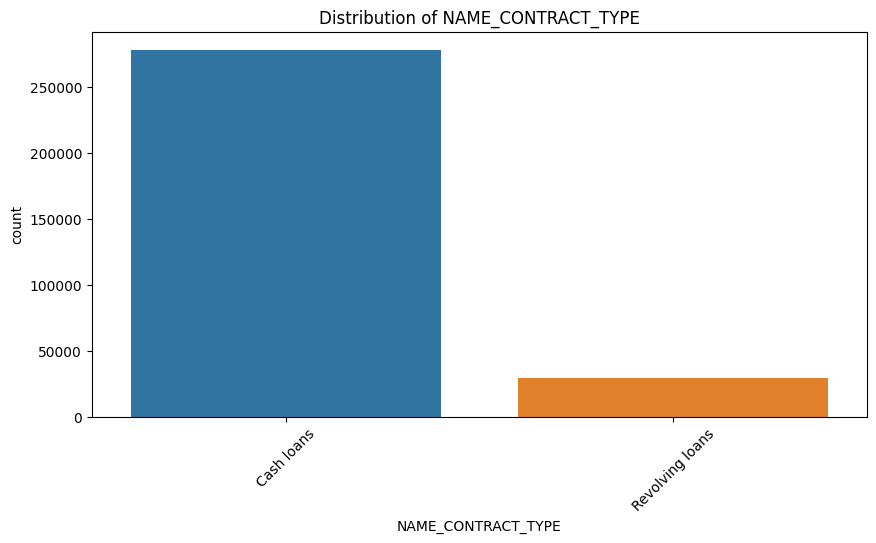

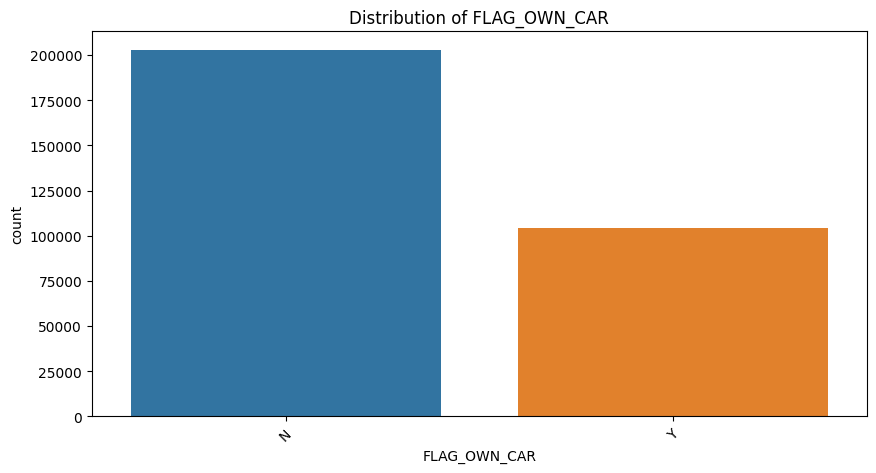

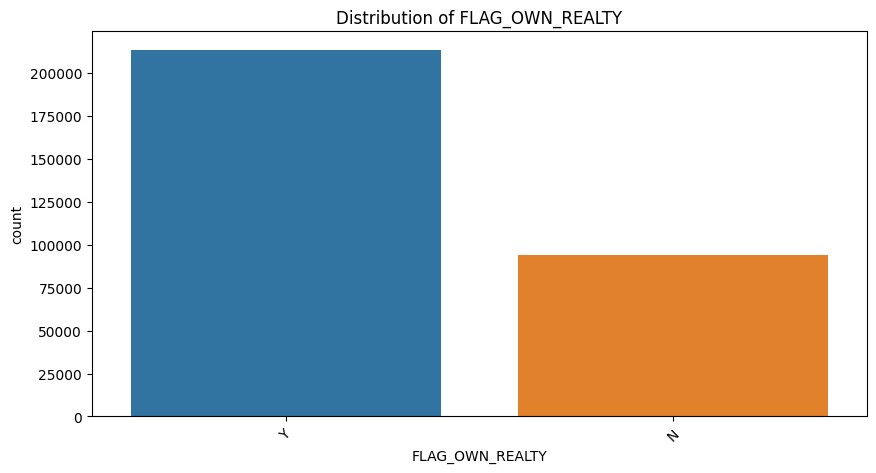

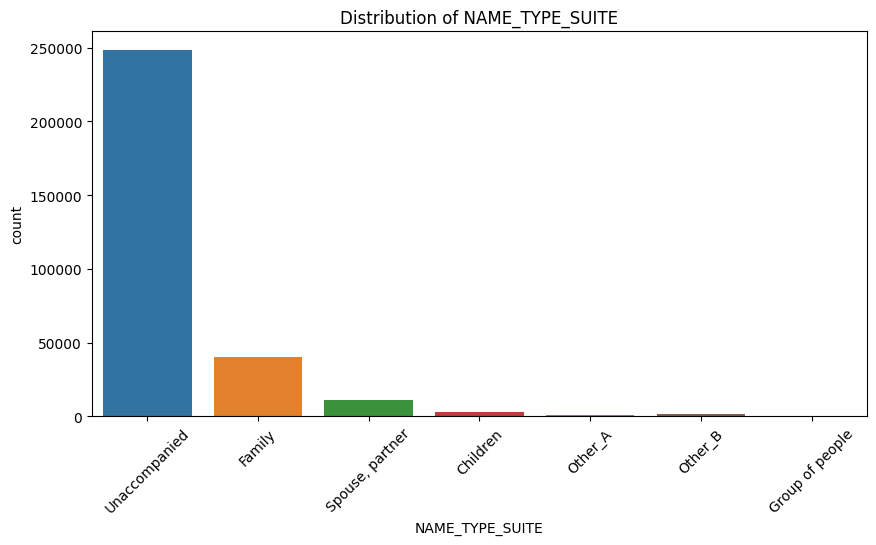

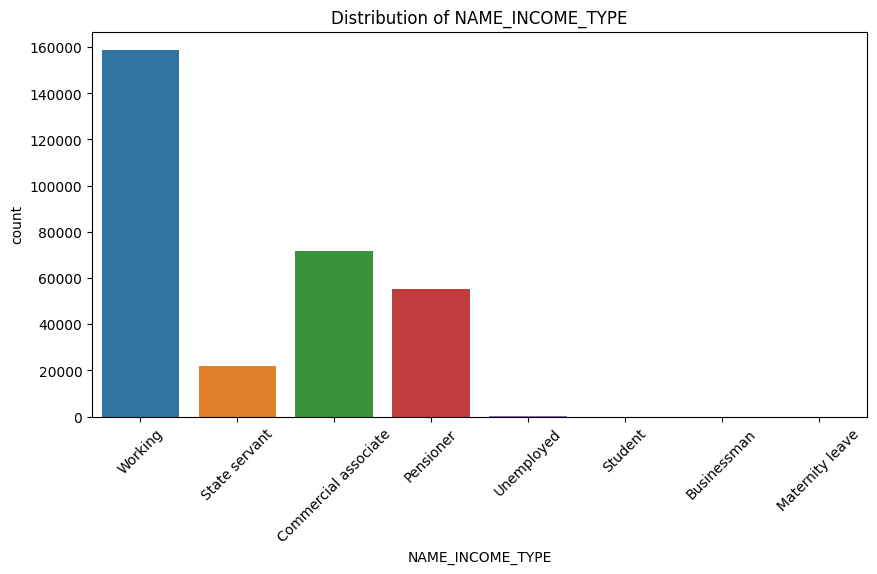

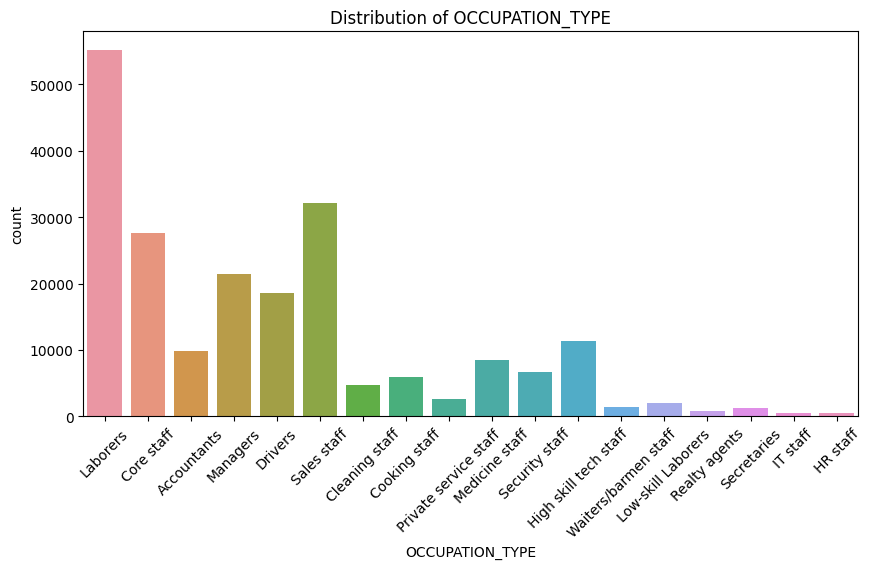

In [ ]:
#visualise for categorical variables without target

# Loop through each categorical column
for column in refined_cat_raw.columns:
    if column != 'SK_ID_CURR':  # Exclude the 'SK_ID_CURR' column from the loop
        # Create a countplot for each categorical column with the target as the hue
        plt.figure(figsize=(10, 5))
        sb.countplot(x=column, data=refined_app)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)  # Rotate x-axis labels if they are too long
        plt.show()


## Removing Outliers (skip this)

In [ ]:
'''
for col in refined_num:
  # Skip the TARGET column
  if (col == "TARGET"):
    continue
  # Find Quartile 1, Quartile 3 and Inter Quartile Range
  temp_Q1 = refined_num[col].quantile(0.25)
  temp_Q3 = refined_num[col].quantile(0.75)
  temp_IQR = temp_Q3 - temp_Q1

  # Find Max and Min Whiskers
  temp_max = temp_Q3 + (1.5 * temp_IQR)
  temp_min = temp_Q1 - (1.5 * temp_IQR)

  # Union to find the Outliers
  refined_num.loc[(refined_num[col] < temp_min, col)] = np.nan
  refined_num.loc[(refined_num[col] > temp_max, col)] = np.nan

  # Drop all rows with NULL value
  refined_num = refined_num.dropna(axis=0)

refined_num = refined_num.reset_index(drop=True)
'''

In [ ]:
'''
print("Categorical Data:\n")
for columns in refined_cat_raw:
  uniqueList_cat = refined_cat_raw[columns].unique()
  print(columns,"(", str(len(uniqueList_cat)), "): ", uniqueList_cat, "\n")

print("\n\nNumerical Data:\n")
for columns in refined_num:
  uniqueList_num = refined_num[columns].unique()
  print(columns,"(", str(len(uniqueList_num)), "): ", uniqueList_num, "\n")
'''

Categorical Data:

SK_ID_CURR ( 307511 ):  [100002 100003 100004 ... 456253 456254 456255] 

NAME_CONTRACT_TYPE ( 2 ):  ['Cash loans' 'Revolving loans'] 

FLAG_OWN_CAR ( 2 ):  ['N' 'Y'] 

FLAG_OWN_REALTY ( 2 ):  ['Y' 'N'] 

NAME_TYPE_SUITE ( 7 ):  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 

NAME_INCOME_TYPE ( 8 ):  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 

OCCUPATION_TYPE ( 19 ):  ['Laborers' 'Core staff' 'Accountants' 'Managers' 'NILL' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff'] 



Numerical Data:

SK_ID_CURR ( 153223 ):  [100003. 100004. 100006. ... 456251. 456254. 456255.] 

TARGET ( 2 ):  [0 1] 

CNT_CHILDREN ( 3 ):  [0. 1. 2.] 

AMT_INCOME_TOTAL ( 1377 ):  [

## One Hot Encoding & Change Y/N to 1/0 (skip this)


In [ ]:
'''
refined_cat_raw_yn = refined_cat_raw[["FLAG_OWN_CAR", "FLAG_OWN_REALTY"]]
refined_cat_raw_ohe = refined_cat_raw[["NAME_CONTRACT_TYPE", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "OCCUPATION_TYPE"]]

for columns in refined_cat_raw_ohe:
  # Create the One Hot Encoding (OHE) dataframe of 1 column
  one_hot_encoded = pd.get_dummies(refined_cat_raw_ohe[columns])

  # Change column name
  for col in one_hot_encoded:
    one_hot_encoded.rename(columns={col: columns+" ("+ col.upper()+")"}, inplace=True)

  # Concatenate OHE back to original datafram and drop original column
  refined_cat_raw_ohe = pd.concat([refined_cat_raw_ohe, one_hot_encoded], axis=1)
  refined_cat_raw_ohe.drop([columns], axis=1, inplace=True)

# Map all Y/N to 1/0 respectively
for columns in refined_cat_raw_yn:
  refined_cat_raw_yn[columns] = refined_cat_raw_yn[columns].map({'Y': 1, 'N': 0})

# Combine both mapping and OHE dataframe
refined_cat = pd.concat([refined_cat_raw_ohe, refined_cat_raw_yn], axis=1)

# Change to data type to integer - needed???
for columns in refined_cat:
  refined_cat[columns] = refined_cat[columns].astype(int)

refined_cat.info()
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                                   Non-Null Count   Dtype
---  ------                                   --------------   -----
 0   NAME_CONTRACT_TYPE (CASH LOANS)          307511 non-null  int64
 1   NAME_CONTRACT_TYPE (REVOLVING LOANS)     307511 non-null  int64
 2   NAME_TYPE_SUITE (CHILDREN)               307511 non-null  int64
 3   NAME_TYPE_SUITE (FAMILY)                 307511 non-null  int64
 4   NAME_TYPE_SUITE (GROUP OF PEOPLE)        307511 non-null  int64
 5   NAME_TYPE_SUITE (OTHER_A)                307511 non-null  int64
 6   NAME_TYPE_SUITE (OTHER_B)                307511 non-null  int64
 7   NAME_TYPE_SUITE (SPOUSE, PARTNER)        307511 non-null  int64
 8   NAME_TYPE_SUITE (UNACCOMPANIED)          307511 non-null  int64
 9   NAME_INCOME_TYPE (BUSINESSMAN)           307511 non-null  int64
 10  NAME_INCOME_TYPE (COMMERCIAL ASSOCIATE)  307511 non-null

<ipython-input-24-6d3cdadaa719>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_cat_raw_yn[columns] = refined_cat_raw_yn[columns].map({'Y': 1, 'N': 0})
<ipython-input-24-6d3cdadaa719>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_cat_raw_yn[columns] = refined_cat_raw_yn[columns].map({'Y': 1, 'N': 0})


# Label Encoder

In [ ]:
from sklearn import preprocessing 

for col in refined_cat_raw:
    if col == "SK_ID_CURR":
        print("skipping id")
        continue
    label_encoder = preprocessing.LabelEncoder()
    refined_cat_raw[col] = label_encoder.fit_transform(refined_cat_raw[col])

refined_cat = refined_cat_raw

skipping id


In [ ]:
refined_cat.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,OCCUPATION_TYPE
0,100002,0,0,1,6,7,8
1,100003,0,0,0,1,4,3
2,100004,1,1,1,6,7,8
3,100006,0,0,1,6,7,8
4,100007,0,0,1,6,7,3
5,100008,0,0,1,5,4,8
6,100009,0,1,1,6,1,0
7,100010,0,1,1,6,4,10
8,100011,0,0,1,0,3,12
9,100012,1,0,1,6,7,8


# Machine Learning

In [ ]:
# Splitting the dataset into train & test (80/20 split)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

X = refined_num.join(refined_cat.set_index("SK_ID_CURR"), on="SK_ID_CURR") 
Y = pd.DataFrame(X["TARGET"])
X.drop(["TARGET"], axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
dataset_list = (X_train, X_test, Y_train, Y_test)

print("Train data shape: ", X_train.shape, "\t\t", "Test data shape: ", X_test.shape)

Train data shape:  (122578, 18) 		 Test data shape:  (30645, 18)


In [ ]:
X.head

<bound method NDFrame.head of         SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0         100003.0           0.0          270000.0   1293502.5      35698.5   
1         100004.0           0.0           67500.0    135000.0       6750.0   
2         100006.0           0.0          135000.0    312682.5      29686.5   
3         100007.0           0.0          121500.0    513000.0      21865.5   
4         100008.0           0.0           99000.0    490495.5      27517.5   
...            ...           ...               ...         ...          ...   
153218    456242.0           0.0          198000.0   1312110.0      52168.5   
153219    456244.0           0.0          261000.0   1303812.0      35982.0   
153220    456251.0           0.0          157500.0    254700.0      27558.0   
153221    456254.0           0.0          171000.0    370107.0      20205.0   
153222    456255.0           0.0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRI

In [ ]:
Y_test.value_counts()

TARGET
0         27916
1          2729
dtype: int64

In [ ]:
# Binary metric for TPR and FPR
def calc_conf_matrix(y_true, y_pred, verbose=1):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]
    TP = CM[1][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    if verbose:
        print("Confusion Matrix:")
        print(CM)
        print("TPR:", TPR)
        print("FPR:", FPR)

    return CM, TPR, FPR

In [ ]:
def evaluate_model(dataset_list, train_pred, test_pred):
    eval_metrics = {}
    (X_train, X_test, Y_train, Y_test) = dataset_list

    # train
    # eval_metrics["train_conf_matrix"] = confusion_matrix(Y_train, train_pred)
    eval_metrics["train_acc"] = accuracy_score(Y_train, train_pred)

    # test
    # eval_metrics["test_conf_matrix"] = confusion_matrix(Y_test, test_pred)
    eval_metrics["test_acc"] = accuracy_score(Y_test, test_pred)
    eval_metrics["precision"] = precision_score(Y_test, test_pred)
    eval_metrics["recall"] = recall_score(Y_test, test_pred)
    eval_metrics["f1_score"] = f1_score(Y_test, test_pred)

    # confusion matrix stats
    CM = confusion_matrix(Y_test, test_pred)
    eval_metrics["TN"] = CM[0][0]
    eval_metrics["FP"] = CM[0][1]
    eval_metrics["FN"] = CM[1][0]
    eval_metrics["TP"] = CM[1][1]

    return eval_metrics

## More Visualizations

<ipython-input-32-e72f97fd4db1>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data=refined_num[col], ax=axes[count, 2])
<ipython-input-32-e72f97fd4db1>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data=refined_num[col], ax=axes[count, 2])


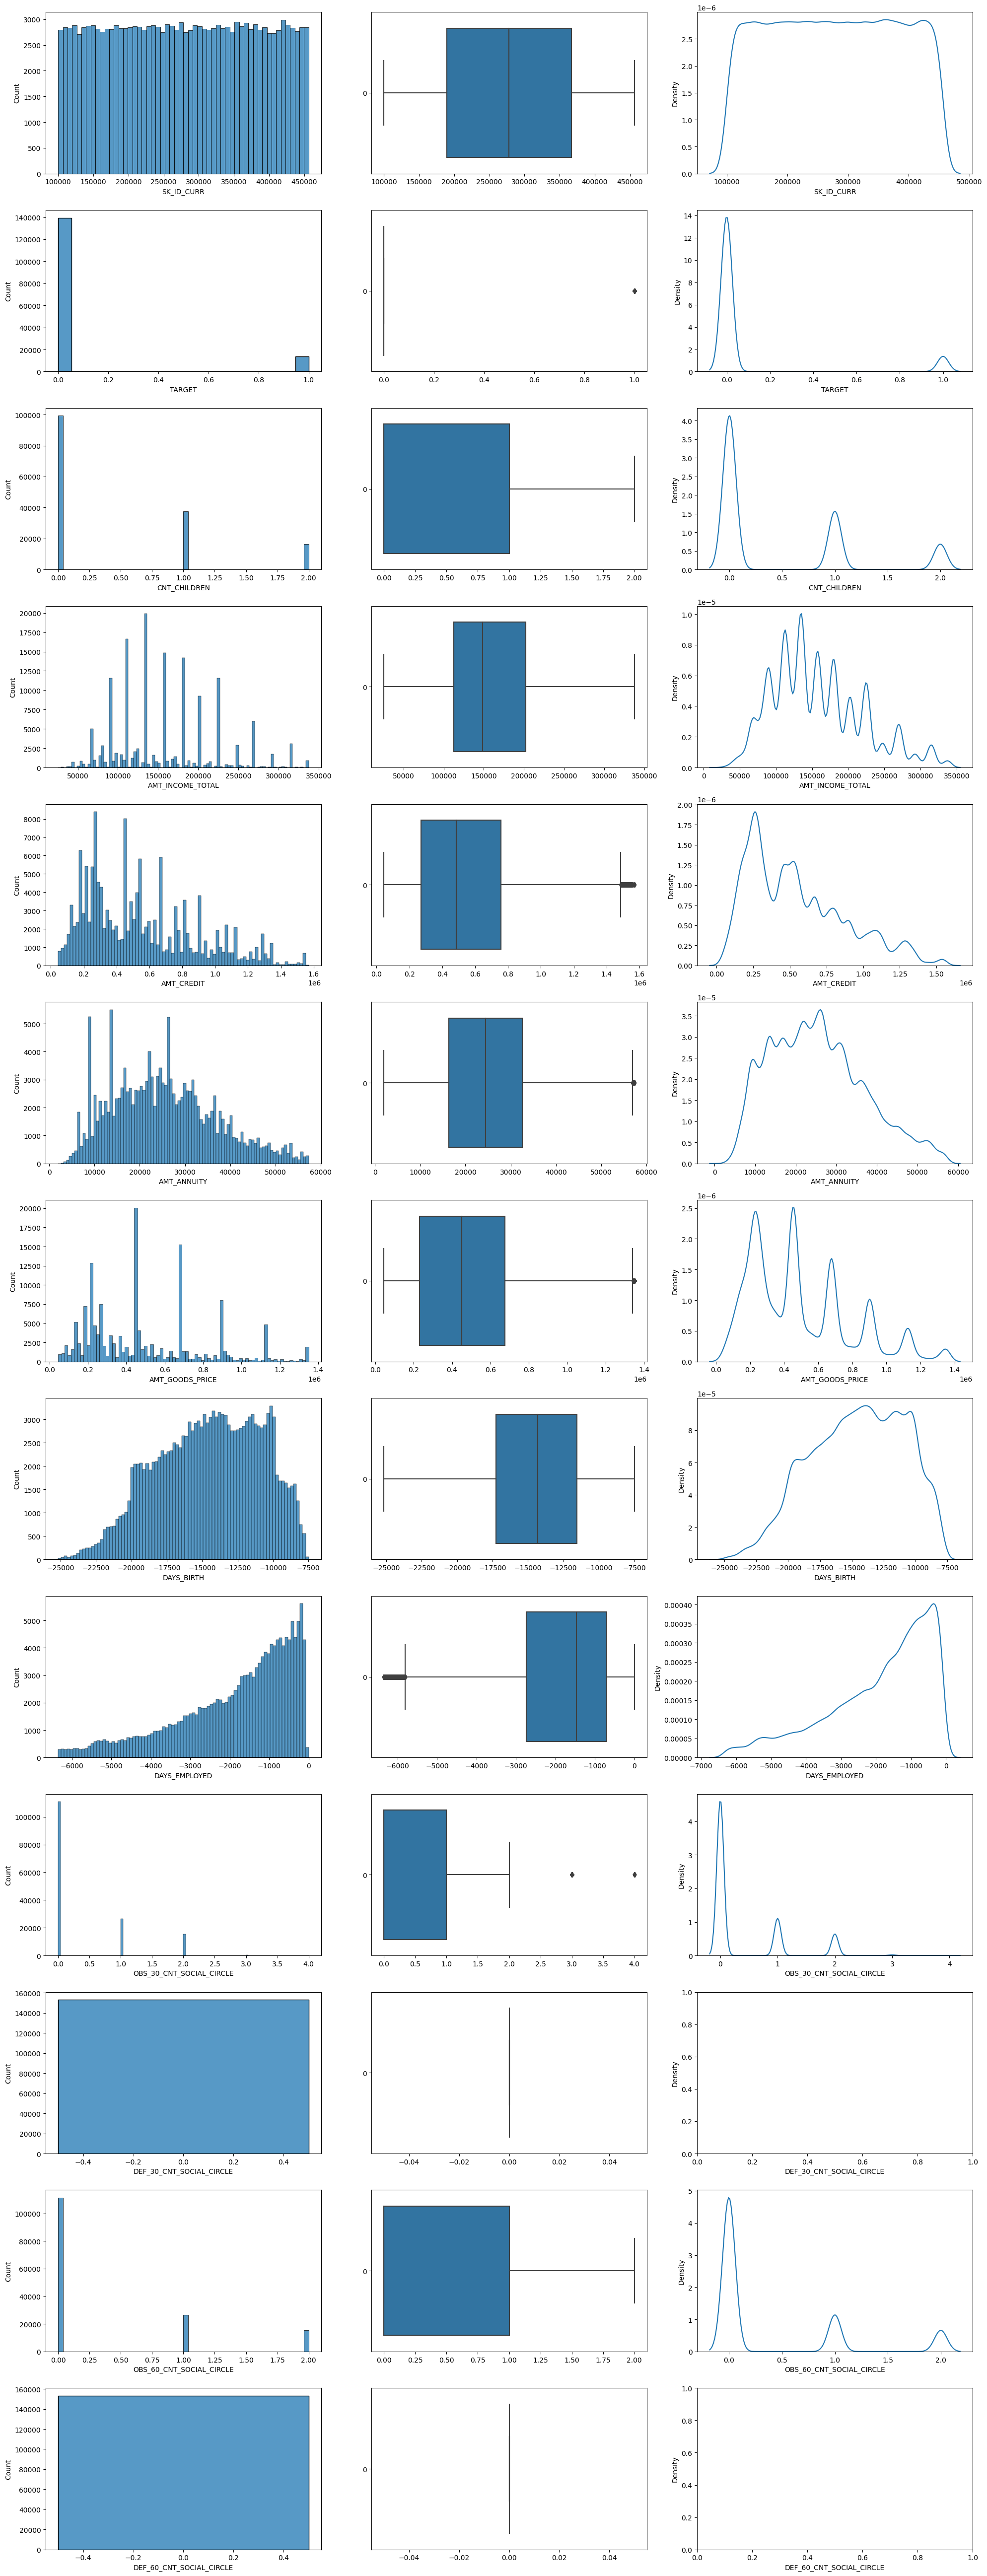

In [ ]:
#visualise updated data after removing outliers
f, axes = plt.subplots(len(refined_num.columns), 3, figsize=(20, len(refined_num.columns) * 4))
count = 0

for col in refined_num:
  sb.histplot(data=refined_num[col], kde=False, ax=axes[count, 0])
  sb.boxplot(data=refined_num[col], orient='h', ax=axes[count, 1])
  sb.kdeplot(data=refined_num[col], ax=axes[count, 2])
  count += 1

plt.tight_layout()
plt.show()


In [ ]:
#to see what values 
# Iterate through the columns in the DataFrame
for column in refined_num.columns:
    # Get the unique values for the current column
    unique_values = refined_num[column].unique()
    
    # Print the column name and its unique values
    print(f"{column} ({len(unique_values)} unique values): {unique_values}\n")


SK_ID_CURR (153223 unique values): [100003. 100004. 100006. ... 456251. 456254. 456255.]

TARGET (2 unique values): [0 1]

CNT_CHILDREN (3 unique values): [0. 1. 2.]

AMT_INCOME_TOTAL (1377 unique values): [270000.   67500.  135000.  ... 110200.5  98356.5 113062.5]

AMT_CREDIT (3701 unique values): [1293502.5  135000.   312682.5 ...  824742.   584104.5 1437799.5]

AMT_ANNUITY (9932 unique values): [35698.5  6750.  29686.5 ... 22207.5 42169.5 49095. ]

AMT_GOODS_PRICE (535 unique values): [1129500.   135000.   297000.   513000.   454500.   405000.   652500.
   67500.   697500.   679500.   247500.   387000.   427500.   927000.
  225000.   270000.   180000.   477000.   360000.  1125000.   450000.
  553500.   540000.   855000.   238500.   598500.  1350000.  1080000.
   90000.   315000.  1035000.   459000.   675000.   256500.   585000.
  643500.   283500.   472500.   720000.   319500.   463500.   445500.
  144000.   166500.   967500.   945000.   306000.   900000.   189000.
  202500.   53100

In [ ]:
#finding the highest correlation to target
# Calculate correlation coefficients
correlations = refined_num.corr()

# Get the correlation coefficients of the 'TARGET' column, excluding itself
target_correlations = correlations['TARGET'].drop('TARGET')

# Sort the correlations in descending order (by absolute value)
sorted_correlations = target_correlations.reindex(target_correlations.abs().sort_values(ascending=False).index)

# Print the sorted correlations
print(sorted_correlations)

# Find the feature with the highest absolute correlation with 'TARGET'
most_correlated_feature = target_correlations.abs().idxmax()
correlation_value = target_correlations[most_correlated_feature]

print(f"The most correlated factor with TARGET is '{most_correlated_feature}', with a correlation value of {correlation_value:.4f}.")

#check how many frauds are there after 
# Count the number of occurrences of each value in the "TARGET" column
target_counts = refined_num["TARGET"].value_counts()

# Print the number of frauds (TARGET = 1)
print("Number of frauds (TARGET = 1) after dropping outliers:", target_counts[1])


DAYS_EMPLOYED               0.069699
DAYS_BIRTH                  0.060687
AMT_GOODS_PRICE            -0.034187
AMT_INCOME_TOTAL           -0.025539
AMT_CREDIT                 -0.022504
OBS_60_CNT_SOCIAL_CIRCLE   -0.010150
OBS_30_CNT_SOCIAL_CIRCLE   -0.009355
AMT_ANNUITY                 0.003939
CNT_CHILDREN                0.001150
SK_ID_CURR                  0.000545
DEF_30_CNT_SOCIAL_CIRCLE         NaN
DEF_60_CNT_SOCIAL_CIRCLE         NaN
Name: TARGET, dtype: float64
The most correlated factor with TARGET is 'DAYS_EMPLOYED', with a correlation value of 0.0697.
Number of frauds (TARGET = 1) after dropping outliers: 13671


## Decision Tree Classifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


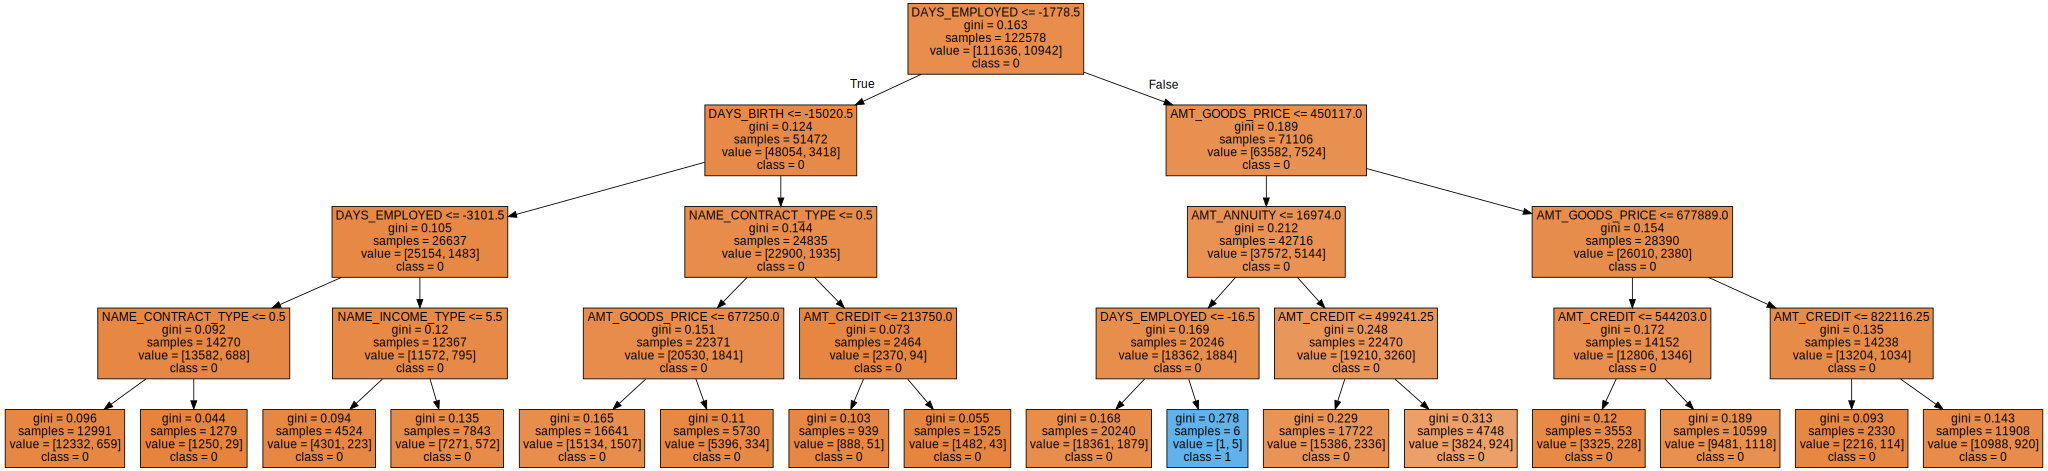

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#create decision tree
dectree = DecisionTreeClassifier(max_depth = 4)
#train model
dectree.fit(X_train, Y_train)

#f = plt.figure(figsize=(25,20))
#plot_tree(dectree, filled=True, rounded=True, 
#        feature_names=X_train.columns, 
#        class_names=["N", "Y"])
#plt.show()

! pip install graphviz
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dectree, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=["0", "1"],
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


Since days employed has the highest correlation, we find the TPR, FPR for it.
To do so, we can find the median of days employed to split the data.

Since data is imbalanced, the TPR and FPR rates are low. therefore we need to use SMOTE


{'train_acc': 0.9107670218146813, 'test_acc': 0.9109153206069506, 'precision': 0.3333333333333333, 'recall': 0.00036643459142543056, 'f1_score': 0.0007320644216691069, 'TN': 27914, 'FP': 2, 'FN': 2728, 'TP': 1}
Confusion Matrix:
[[27914     2]
 [ 2728     1]]
TPR: 0.00036643459142543056
FPR: 7.164350193437455e-05


<Axes: >

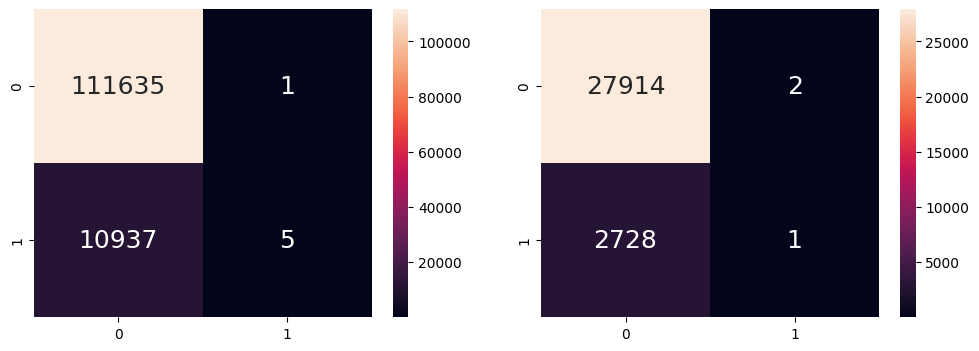

In [ ]:
Y_train_dectree = dectree.predict(X_train)
Y_test_dectree = dectree.predict(X_test)

dectree_metrics = evaluate_model(dataset_list, Y_train_dectree, Y_test_dectree)
print(dectree_metrics)

dectree_conf_matrix, dectree_TPR, dectree_FPR = calc_conf_matrix(Y_test, Y_test_dectree)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_dectree),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_dectree), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, Y_train)

<ipython-input-37-0966d68e7246>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=10)

In [ ]:
Y_train_rfc = random_forest.predict(X_train)
Y_test_rfc = random_forest.predict(X_test)

In [ ]:
rfc_metrics = evaluate_model(dataset_list, Y_train_rfc, Y_test_rfc)
print(rfc_metrics)

rfc_conf_matrix, rfc_TPR, rfc_FPR = calc_conf_matrix(Y_test, Y_test_rfc)

{'train_acc': 0.9828272610093165, 'test_acc': 0.909642682329907, 'precision': 0.12962962962962962, 'recall': 0.002565042139978014, 'f1_score': 0.005030542579949694, 'TN': 27869, 'FP': 47, 'FN': 2722, 'TP': 7}
Confusion Matrix:
[[27869    47]
 [ 2722     7]]
TPR: 0.002565042139978014
FPR: 0.001683622295457802


## K-Nearest Neighours Classifier  
extremely slow prediction

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
KNN.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [ ]:
# ~5min to predict
Y_train_knn = KNN.predict(X_train)
Y_test_knn = KNN.predict(X_test)

In [ ]:
knn_metrics = evaluate_model(dataset_list, Y_train_knn, Y_test_knn)
print(knn_metrics)

knn_conf_matrix, knn_TPR, knn_FPR = calc_conf_matrix(Y_test, Y_test_knn)

{'train_acc': 0.9198387965213987, 'test_acc': 0.8909773209332681, 'precision': 0.1339712918660287, 'recall': 0.041040674239648224, 'f1_score': 0.06283309957924264, 'TN': 27192, 'FP': 724, 'FN': 2617, 'TP': 112}
Confusion Matrix:
[[27192   724]
 [ 2617   112]]
TPR: 0.041040674239648224
FPR: 0.02593494770024359


## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
Y_train_gnb = GNB.predict(X_train)
Y_test_gnb = GNB.predict(X_test)

In [ ]:
gnb_metrics = evaluate_model(dataset_list, Y_train_gnb, Y_test_gnb)
print(gnb_metrics)

gnb_conf_matrix, gnb_TPR, gnb_FPR = calc_conf_matrix(Y_test, Y_test_gnb)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'train_acc': 0.9107343895315636, 'test_acc': 0.910947952357644, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'TN': 27916, 'FP': 0, 'FN': 2729, 'TP': 0}
Confusion Matrix:
[[27916     0]
 [ 2729     0]]
TPR: 0.0
FPR: 0.0


## Comparing Models

In [ ]:
model_df = pd.DataFrame.from_dict([dectree_metrics])
model_df = pd.concat([model_df, pd.DataFrame.from_dict([rfc_metrics])], ignore_index=True)
model_df = pd.concat([model_df, pd.DataFrame.from_dict([knn_metrics])], ignore_index=True)
model_df = pd.concat([model_df, pd.DataFrame.from_dict([gnb_metrics])], ignore_index=True)
model_df.insert(0, "model", ["dec_tree", "rfc", "knn", "gnb"])

model_df

,model,train_acc,test_acc,precision,recall,f1_score,TN,FP,FN,TP
0,dec_tree,0.910767,0.910915,0.333333,0.000366,0.000732,27914,2,2728,1
1,rfc,0.982827,0.909643,0.129630,0.002565,0.005031,27869,47,2722,7
2,knn,0.919839,0.890977,0.133971,0.041041,0.062833,27192,724,2617,112
3,gnb,0.910734,0.910948,0.000000,0.000000,0.000000,27916,0,2729,0


In [ ]:
model_df.sort_values(by=["test_acc"], ascending=False, inplace=True)
model_df

,model,train_acc,test_acc,precision,recall,f1_score,TN,FP,FN,TP
3,gnb,0.910734,0.910948,0.000000,0.000000,0.000000,27916,0,2729,0
0,dec_tree,0.910767,0.910915,0.333333,0.000366,0.000732,27914,2,2728,1
1,rfc,0.982827,0.909643,0.129630,0.002565,0.005031,27869,47,2722,7
2,knn,0.919839,0.890977,0.133971,0.041041,0.062833,27192,724,2617,112


# SMOTE test

In [ ]:
Y_train.value_counts()

TARGET
0         111636
1          10942
dtype: int64

<Axes: xlabel='TARGET', ylabel='count'>

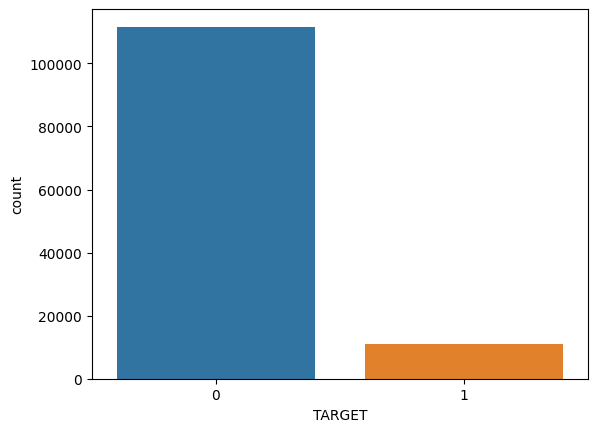

In [ ]:
sb.countplot(data=Y_train, x="TARGET")

There is a large imbalance of data

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
Y_train_smote.value_counts()

TARGET
0         111636
1         111636
dtype: int64

<Axes: xlabel='TARGET', ylabel='count'>

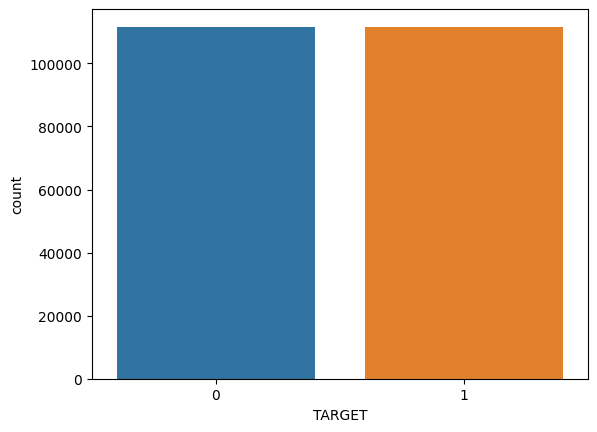

In [ ]:
sb.countplot(data=Y_train_smote, x="TARGET")

In [ ]:
# helper function to run all models
def eval_all_models(dataset_list):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    model_list=[DecisionTreeClassifier(max_depth = 4), 
                RandomForestClassifier(n_estimators=10),
                KNeighborsClassifier(n_jobs=-1, n_neighbors=3),
                GaussianNB()]

    (X_train, X_test, Y_train, Y_test) = dataset_list

    model_df = pd.DataFrame()

    for model in model_list:
        model.fit(X_train, Y_train)

        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)

        model_metrics = evaluate_model(dataset_list, Y_train_pred, Y_test_pred)

        model_df = pd.concat([model_df, pd.DataFrame.from_dict([model_metrics])], ignore_index=True)

    model_df.insert(0, "model", ["dec_tree", "rfc", "knn", "gnb"])

    return model_df

In [ ]:
smote_model_df = eval_all_models((X_train_smote, X_test, Y_train_smote, Y_test))

<ipython-input-53-397dd1cafb52>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
smote_model_df.sort_values(by=["test_acc"], ascending=False, inplace=True)
smote_model_df

,model,train_acc,test_acc,precision,recall,f1_score,TN,FP,FN,TP
1,rfc,0.993098,0.890814,0.128761,0.039209,0.060112,27192,724,2622,107
0,dec_tree,0.743291,0.765574,0.090909,0.181385,0.121116,22966,4950,2234,495
2,knn,0.923125,0.703182,0.096770,0.279956,0.143825,20785,7131,1965,764
3,gnb,0.594042,0.457758,0.103969,0.668010,0.179934,12205,15711,906,1823


Although accuracy might have decreased, the model is now more representative of the data we aim to predict

In [ ]:
# Combine the resampled feature matrix and target array into a single DataFrame
smote_df = pd.concat([X_train_smote, Y_train_smote], axis=1)

# Calculate correlation coefficients
correlations = smote_df.corr()

# Get the correlation coefficients of the 'TARGET' column, excluding itself
target_correlations = correlations['TARGET'].drop('TARGET')

# Sort the correlations in descending order (by absolute value)
sorted_correlations = target_correlations.reindex(target_correlations.abs().sort_values(ascending=False).index)

# Print the sorted correlations
print(sorted_correlations)

# Find the feature with the highest absolute correlation with 'TARGET'
most_correlated_feature = target_correlations.abs().idxmax()
correlation_value = target_correlations[most_correlated_feature]

print(f"The most correlated factor with TARGET is '{most_correlated_feature}', with a correlation value of {correlation_value:.4f}.")

# Count the number of occurrences of each value in the "TARGET" column
target_counts = smote_df["TARGET"].value_counts()


FLAG_OWN_CAR               -0.278647
FLAG_OWN_REALTY            -0.210410
DAYS_EMPLOYED               0.142916
NAME_CONTRACT_TYPE         -0.127142
DAYS_BIRTH                  0.124180
AMT_GOODS_PRICE            -0.065508
AMT_INCOME_TOTAL           -0.051444
AMT_CREDIT                 -0.044920
NAME_INCOME_TYPE            0.027394
OCCUPATION_TYPE            -0.023302
OBS_60_CNT_SOCIAL_CIRCLE   -0.019977
OBS_30_CNT_SOCIAL_CIRCLE   -0.018194
NAME_TYPE_SUITE            -0.016024
CNT_CHILDREN                0.008865
AMT_ANNUITY                 0.003912
SK_ID_CURR                  0.001456
DEF_30_CNT_SOCIAL_CIRCLE         NaN
DEF_60_CNT_SOCIAL_CIRCLE         NaN
Name: TARGET, dtype: float64
The most correlated factor with TARGET is 'FLAG_OWN_CAR', with a correlation value of -0.2786.
